#  Обратное распространение ошибки

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* http://cs231n.stanford.edu/handouts/linear-backprop.pdf
* https://www.adityaagrawal.net/blog/deep_learning/bprop_fc
* https://en.wikipedia.org/wiki/Stochastic_gradient_descent

## Задачи для совместного разбора

1\. Реализуйте обратное распространение ошибки для модели нейрона с квадратичной функцией потерь при условии, что на вход нейрону поступает вектор `inputs`. Проверьте корректность вычисления градиентов, воспользовавшись возможностями по автоматическому дифференцированию `torch`.

In [ ]:
class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def forward(self, inputs):   # прямое распространение ошибки
    return inputs @ self.weights + self.bias

  def backward(self, inputs, dldy):    # обратное распространение ошибки
    self.dw = dldy * inputs    # градиент весов
    self.db = dldy     # градиент смещения

In [ ]:
class Loss:   #функция потери
  def forward(self, y_pred, y_true):
    return (y_pred - y_true) ** 2

  def backward(self, y_pred, y_true):
    # dL/dy~
    self.dypred = 2*(y_pred - y_true)    # градиент функции активации dl/dy

In [ ]:
import torch as th

x = th.tensor([2.0, 3.0])
y = th.tensor(5.0)
neuron = Neuron(
    weights=th.tensor([3.5, 4.5]),
    bias=0.5,
)

criterion = Loss()
y_pred = neuron.forward(x)
loss = criterion.forward(y_pred, y)

criterion.backward(y_pred, y)
neuron.backward(x, criterion.dypred)

In [ ]:
# neuron.weights -= lr* neuron.dw
# neuron.bias -= lr* neuron.db

2\. Настройте модель нейрона, используя метод стохастического градиентного спуска

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Реализуйте обратное распространение ошибки для модели нейрона с функцией потерь MSE при условии, что на вход нейрону поступает пакет (двумерный тензор) `inputs`. Проверьте корректность вычисления градиентов, воспользовавшись возможностями по автоматическому дифференцированию `torch`.

$$\mathbf{X} = \begin{bmatrix}
x_{10} & x_{11} & \ldots & x_{1m} \\
x_{20} & x_{21} & \ldots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{k0} & x_{k1} & \ldots & x_{km} \\
\end{bmatrix}
\mathbf{Y} = \begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{k} \\
\end{bmatrix}
\mathbf{W} = \begin{bmatrix}
w_{0} \\
w_{1} \\
\vdots \\
w_{m} \\
\end{bmatrix}$$

$$\hat{\mathbf{Y}} = \mathbf{X}\times \mathbf{W}$$

$$L = \frac{1}{k}\sum_{k}{(\hat{y_k}-y_k)^2}$$

$$\nabla_{\hat{\mathbf{Y}}} L=\begin{bmatrix}
\frac{\partial L}{\partial \hat{y_1}} \\
\frac{\partial L}{\partial \hat{y_2}} \\
\vdots \\
\frac{\partial L}{\partial \hat{y_k}} \\
\end{bmatrix} = \frac{2}{k}\begin{bmatrix}
\hat{y_1} - y_1 \\
\hat{y_2} - y_2 \\
\vdots \\
\hat{y_k} - y_k \\
\end{bmatrix}$$

$$\boldsymbol{\nabla_{\mathbf{W}} L = \mathbf{X}^T\nabla_{\hat{\mathbf{Y}}} L}$$

In [ ]:
import torch as th

In [ ]:
class Neuron():
  def __init__(self, weights):
    self.weights = weights
    # self.bias = bias

  def forward(self, inputs):
    return inputs @ self.weights

  def backward(self, inputs, dldy):
    self.dw = inputs.T @ dldy
    # self.db = dldy

In [ ]:
class MSELoss():
  def forward(self, y_pred, y_true):
    return 1/len(y_pred) * ((y_pred - y_true)**2).sum()

  def backward(self, y_pred, y_true):
    self.dypred = 2/y_pred.shape[0]*(y_pred - y_true)   # dl/dy

In [ ]:
# прямое распространение
x = th.tensor([[1, 3, 2],[0, 1, 3]], dtype=th.float32)
y = th.tensor([4,2], dtype=th.float32)
weights = th.tensor([1,0, -1], dtype=th.float32)
# bias = th.tensor([3, 2], dtype=th.float32)

neuron = Neuron(weights = weights)
y_pred = neuron.forward(inputs = x); y_pred

tensor([-1., -3.])

In [ ]:
loss = MSELoss()
loss.forward(y_pred, y)

tensor(25.)

In [ ]:
# обратное рсапространение

loss.backward(y_pred, y)
# neuron.dw, neuron.db  # градиенты

In [ ]:
loss.dypred

tensor([-5., -5.])

In [ ]:
neuron.backward(x,loss.dypred)
neuron.dw

tensor([ -5., -20., -25.])

In [ ]:
# проверка
# dldy

y_pred = th.tensor(y_pred, requires_grad=True)
l =th.nn.MSELoss()(y_pred, y)
l.backward()
y_pred.grad

<ipython-input-13-b230c28cde12>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = th.tensor(y_pred, requires_grad=True)


tensor([-5., -5.])

In [ ]:
# проверка
# dl/dw
# ∇WL=XT∇Y^L
w = th.tensor(weights, requires_grad=True)
x = th.tensor([[1, 3, 2],[0, 1, 3]], dtype=th.float32)
l = th.nn.MSELoss()(Neuron(weights = w).forward(x), y)
l.backward()
w.grad

<ipython-input-14-6c7c315a5637>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  w = th.tensor(weights, requires_grad=True)


tensor([ -5., -20., -25.])

<p class="task" id="2"></p>

2\. Настройте модель нейрона, используя метод мини-пакетного градиентного спуска. Используйте обратное распространение ошибки, реализованное самостоятельно.

In [ ]:
from sklearn.datasets import make_regression
import torch as th

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)
X.shape

torch.Size([100, 4])

In [ ]:
class Neuron():
  def __init__(self, weights):
    self.weights = weights
    # self.bias = bias

  def forward(self, inputs):
    return inputs @ self.weights

  def backward(self, inputs, dldy, learning_rate):
    self.dw = inputs.T @ dldy
    # self.db = dldy
    self.learning_rate = learning_rate
    self.weights -= self.learning_rate*self.dw

In [ ]:
class MSELoss():
  def forward(self, y_pred, y_true):
    return 1/len(y_pred) * ((y_pred - y_true)**2).sum()

  def backward(self, y_pred, y_true):
    self.dypred = 2/y_pred.shape[0]*(y_pred - y_true)   # dl/dy

In [ ]:
weights = th.randn(X.shape[0])
neuron = Neuron(weights)

In [ ]:
import numpy as np

def mini_batch_gradient(X, y, num_epochs, batch_size):
    for epoch in range(num_epochs):
      ind = np.random.permutation(X.shape[0])    # перемешивание индексов
      X = X[ind]
      y = y[ind]

      for i in range(0, X.shape[0], batch_size):   # создание мини-батчей
        X_batch = X[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        weights = th.randn(X_batch.size()[1], 1)

        neuron = Neuron(weights)
        y_pred = neuron.forward(X_batch)
        loss.backward(y_pred, y_batch)
        neuron.backward(X_batch, loss.dypred,    = 0.1)

        # dw = neuron.dw
        # weights -= learning_rate * dw    # обновляем веса модели
    #     # b -= learning_rate * db

    return neuron.weights

In [ ]:
mini_batch_gradient(X, y, num_epochs = 100, batch_size = 10)

tensor([[ 3.4151],
        [15.9171],
        [-1.3195],
        [ 7.9808]])

In [ ]:
coef

array([ 5.63754967, 86.47223763, 27.34070719, 41.48195023])

<p class="task" id="3"></p>

3\. Реализуйте обратное распространение ошибки для модели полносвязного слоя с функцией потерь MSE при условии, что на вход нейрону поступает пакет (двумерный тензор) `inputs`.  Проверьте корректность вычисления градиентов, воспользовавшись возможностями по автоматическому дифференцированию `torch`.

$$\mathbf{X} = \begin{bmatrix}
x_{10} & x_{11} & \ldots & x_{1m} \\
x_{20} & x_{21} & \ldots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{k0} & x_{k1} & \ldots & x_{km} \\
\end{bmatrix}
\mathbf{Y} = \begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{k} \\
\end{bmatrix}
\mathbf{W} = \begin{bmatrix}
w_{01} & w_{02} & \ldots & w_{0n} \\
w_{11} & w_{12} & \ldots & w_{1n} \\
\vdots & \vdots & \ddots & \vdots \\
w_{m1} & w_{m2} & \ldots & w_{mn} \\
\end{bmatrix}$$

$$\hat{\mathbf{Y}} = \mathbf{X}\times \mathbf{W}$$

$$\nabla_{\hat{\mathbf{Y}}} L = \begin{bmatrix}
\frac{\partial L}{\partial \hat{y_{11}}} & \ldots & \frac{\partial L}{\partial \hat{y_{1n}}} \\
\vdots & \vdots & \vdots \\
\frac{\partial L}{\partial \hat{y_{k1}}} & \ldots & \frac{\partial L}{\partial \hat{y_{kn}}} \\
\end{bmatrix}$$

$$\boldsymbol{\nabla_{\mathbf{W}} L = \mathbf{X}^T\times \nabla_{\hat{\mathbf{Y}}} L}$$
$$\boldsymbol{\nabla_{\mathbf{X}} L = \nabla_{\hat{\mathbf{Y}}} L\times \mathbf{W}^T}$$

In [ ]:
class Neuron():
  def __init__(self, weights):
    self.weights = weights

  def forward(self, inputs):
    return inputs @ self.weights

  def backward(self, inputs, dldy):
    self.dw = inputs.T @ dldy
    self.dx = dldy @ self.weights.T

In [ ]:
class MSELoss():
  def forward(self, y_pred, y_true):
    return 1/len(y_pred) * ((y_pred - y_true)**2).sum()

  def backward(self, y_pred, y_true):
    self.dypred = 2/y_pred.shape[0]*(y_pred - y_true)   # dl/dy

In [ ]:
# прямое распространение
x = th.tensor([[1, 3, 2],[0, 1, 3]], dtype=th.float32)
y = th.tensor([4,2], dtype=th.float32)
weights = th.tensor([[1,0], [0,-1], [1,-1]], dtype=th.float32)
# bias = th.tensor([3, 2], dtype=th.float32)

neuron = Neuron(weights = weights)
y_pred = neuron.forward(inputs = x); y_pred

tensor([[ 3., -5.],
        [ 3., -4.]])

In [ ]:
loss = MSELoss()
loss.forward(y_pred, y)

tensor(43.5000)

In [ ]:
# обратное рсапространение

loss.backward(y_pred, y)
# neuron.dw, neuron.db  # градиенты

In [ ]:
loss.dypred

tensor([[-1., -7.],
        [-1., -6.]])

In [ ]:
neuron.backward(x,loss.dypred)
neuron.dw, neuron.dx

(tensor([[ -1.,  -7.],
         [ -4., -27.],
         [ -5., -32.]]),
 tensor([[-1.,  7.,  6.],
         [-1.,  6.,  5.]]))

In [ ]:
# проверка

# dldy

y_pred = th.tensor(y_pred, requires_grad=True)
l =th.nn.MSELoss()(y_pred, y)
l.backward()
y_pred.grad

<ipython-input-29-a8c8a8dc976f>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = th.tensor(y_pred, requires_grad=True)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor([[-0.5000, -3.5000],
        [-0.5000, -3.0000]])

In [ ]:
# проверка
# dl/dw

w = th.tensor(weights, requires_grad=True)
x = th.tensor([[1, 3, 2],[0, 1, 3]], dtype=th.float32)
l = th.nn.MSELoss()(Neuron(weights = w).forward(x), y)
l.backward()
w.grad

<ipython-input-30-354a0be1e404>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  w = th.tensor(weights, requires_grad=True)


tensor([[ -0.5000,  -3.5000],
        [ -2.0000, -13.5000],
        [ -2.5000, -16.0000]])

In [ ]:
# проверка
# dl/dx

weights = th.tensor([[1,0], [0,-1], [1,-1]], dtype=th.float32)
x = th.tensor(x,  requires_grad=True)
l = th.nn.MSELoss()(Neuron(weights = w).forward(x), y)
l.backward()
x.grad

<ipython-input-31-455cd8b91f3a>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = th.tensor(x,  requires_grad=True)


tensor([[-0.5000,  3.5000,  3.0000],
        [-0.5000,  3.0000,  2.5000]])

<p class="task" id="4"></p>

4\. Настройте полносвязный слой, используя метод пакетного градиентного спуска. Используйте обратное распространение ошибки, реализованное самостоятельно.

In [ ]:
from sklearn.datasets import make_regression
import torch as th

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

weights = th.randn(X.shape[1], 10)
X.shape, weights.shape

(torch.Size([100, 4]), torch.Size([4, 10]))

In [ ]:
class Neuron():
  def __init__(self, weights):
    self.weights = weights

  def forward(self, inputs):
    return inputs @ self.weights

  def backward(self, inputs, dldy, learning_rate):
    self.dw = inputs.T @ dldy
    self.dx = dldy @ self.weights.T
    # Обновление
    self.learning_rate = learning_rate
    self.weights -= self.learning_rate*self.dw
    # self.x -= self.learning_rate*self.dx

In [ ]:
class MSELoss():
  def forward(self, y_pred, y_true):
    return 1/len(y_pred) * ((y_pred - y_true)**2).sum()

  def backward(self, y_pred, y_true):
    self.dypred = 2/y_pred.shape[0]*(y_pred - y_true)   # dl/dy

In [ ]:
# набор обучающих данных используется для вычисления градиента функции потерь на каждой итерации обучения

In [ ]:
def batch_gradient(X, y, num_epochs):

  for epoch in range(num_epochs):

    neuron = Neuron(weights = weights)
    y_pred = neuron.forward(X)

    loss = MSELoss()
    loss.backward(y_pred, y)

    loss.dypred
    neuron.backward(X, loss.dypred, learning_rate = 0.1)

  return neuron.weights


In [ ]:
batch_gradient(X, y, num_epochs = 100)

tensor([[-0.0168, -0.0168, -0.0168, -0.0168, -0.0168, -0.0168, -0.0168, -0.0168,
         -0.0168, -0.0168]])

In [ ]:
coef

array([ 5.63754967, 86.47223763, 27.34070719, 41.48195023])

<p class="task" id="5"></p>

5\. Используя решения предыдущих задач, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Полносвязный слой с 1 нейроном

В процессе обучения сохраняйте прогнозы промежуточных моделей. Визуализируйте облако точек и промежуточные прогнозы не менее 4 промежуточных моделей. Визуализируйте прогнозы итоговой модели.

In [ ]:
import torch as th
import numpy as np
import matplotlib.pyplot as plt

th.manual_seed(42)
X = th.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * th.rand(X.size())
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [ ]:
class Neuron():
  def __init__(self, weights):
    self.weights = weights
    # self.bias = bias

  def forward(self, inputs):
    return inputs @ self.weights

  def backward(self, inputs, dldy, learning_rate):
    self.dw = inputs.T @ dldy
    # self.db = dldy
    self.learning_rate = learning_rate
    self.weights -= self.learning_rate*self.dw

In [ ]:
class MSELoss():
  def forward(self, y_pred, y_true):
    return 1/len(y_pred) * ((y_pred - y_true)**2).sum()

  def backward(self, y_pred, y_true):
    self.dypred = 2/y_pred.shape[0]*(y_pred - y_true)   # dl/dy

In [ ]:
loss = MSELoss()
neuron = Neuron(th.randn(X.shape[1], 10))
n_epochs = 1000
y_pred_list = []
losses = []

for epoch in range(n_epochs):

    y_pred = neuron.forward(X)
    y_pred_list.append(y_pred)

    l = loss.forward(y_pred, y)
    # print(l)
    losses.append(l.item())


    loss.backward(y_pred, y)
    loss.dypred
    neuron.backward(X, loss.dypred, learning_rate = 0.1)
    # neuron.weights -= learning_rate * neuron.weights
    weights = neuron.weights
    # neuron.bias -= learning_rate * neuron.dbias

# y_pred_list
losses[0:1000:100]

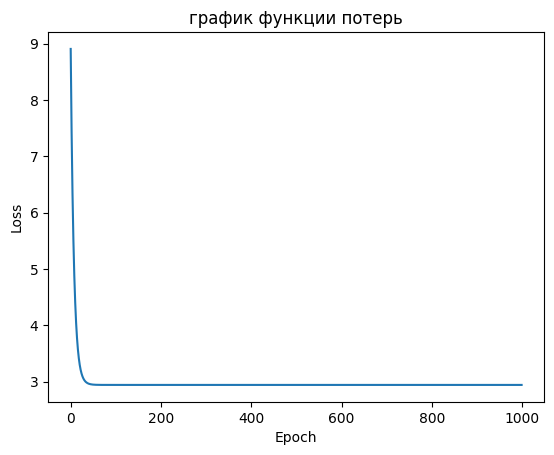

In [ ]:
plt.plot(losses)
plt.title("график функции потерь")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
y_pred_list

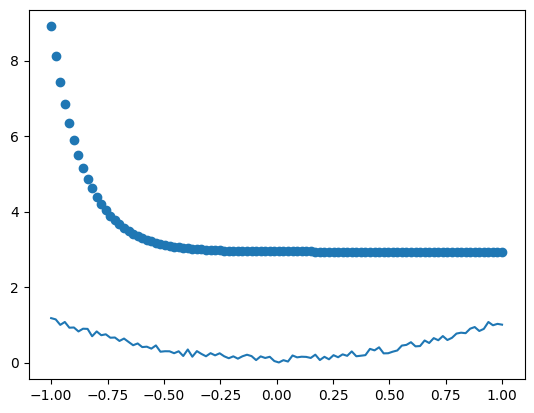

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X.numpy(), y.numpy())
plt.scatter(X.numpy(), losses[:X.shape[0]])

<p class="task" id="6"></p>

6\. Cоздайте нейросеть и решите задачу регрессии из предыдущей задачи.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

В процессе обучения сохраняйте прогнозы промежуточных моделей. Визуализируйте облако точек и промежуточные прогнозы не менее 4 промежуточных моделей. Визуализируйте прогнозы итоговой модели.

In [ ]:
th.manual_seed(42)
X = th.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * th.rand(X.size())
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [ ]:
class ReLU:
  def forward(self, inputs):
    # <реализовать логику ReLU>
    return th.clip(inputs, min=0)   # обрезвает значения <0 до 0,

  def backward(self, dvalues):
    self.dinputs = dvalues.clone()
    self.dinputs[self.inputs <= 0] = 0

In [ ]:
class Neuron():
  def __init__(self, weights):
    self.weights = weights
    # self.bias = bias

  def forward(self, inputs):
    return inputs @ self.weights

  def backward(self, inputs, dldy, learning_rate):
    self.dw = inputs.T @ dldy
    # self.db = dldy
    self.learning_rate = learning_rate
    self.weights -= self.learning_rate*self.dw

In [ ]:
class MSELoss():
  def forward(self, y_pred, y_true):
    return 1/len(y_pred) * ((y_pred - y_true)**2).sum()

  def backward(self, y_pred, y_true):
    self.dypred = 2/y_pred.shape[0]*(y_pred - y_true)   # dl/dy

In [ ]:
loss = MSELoss()
neuron = Neuron(th.randn(X.shape[1], 10))
n_epochs = 1000
y_pred_list = []
losses = []

for epoch in range(n_epochs):

    y_pred = neuron.forward(X)
    y_pred_list.append(y_pred)

    l = loss.forward(y_pred, y)
    # print(l)
    losses.append(l.item())


    loss.backward(y_pred, y)
    loss.dypred
    neuron.backward(X, loss.dypred, learning_rate = 0.1)
    # neuron.weights -= learning_rate * neuron.weights
    weights = neuron.weights
    # neuron.bias -= learning_rate * neuron.dbias

# y_pred_list
losses[0:1000:100]

## Обратная связь
- [ ] Хочу получить обратную связь по решению